###  **Loading and Analysing Bonds Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data/Bonds.csv')

In [ ]:
data.head()

,money_start,money_goal,period,bonds
0,8000,17000,1,4.13
1,6000,10000,1,4.13
2,7000,9000,1,4.13
3,2000,5000,1,4.13
4,9000,11000,1,4.13


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   money_start  500 non-null    int64  
 1   money_goal   500 non-null    int64  
 2   period       500 non-null    int64  
 3   bonds        500 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [ ]:
data['period'] = data['period'].astype(int) ## Converting data type of period to int

### **Feature Engineering**

Including the revelant columns calculated from the existing ones

In [ ]:
import numpy as np

lst1 = []
for j in range(0,len(data)):
    period = data['period'][j]+1

    a = data['money_start'][j]*((1+data['bonds'][j]/100)**period)
    lst1 = np.append(lst1,a)

In [ ]:
data['term1'] = lst1

In [ ]:


lst = []
for j in range(0,len(data)):
    period = data['period'][j]+1

    a = sum((1+ data['bonds'][j]/100)**(period-i) for i in range(1,period))
    lst = np.append(lst,a)



In [ ]:
data['term2'] = lst

In [ ]:
data.head()

,money_start,money_goal,period,bonds,term1,term2
0,8000,17000,1,4.13,8674.44552,1.0413
1,6000,10000,1,4.13,6505.83414,1.0413
2,7000,9000,1,4.13,7590.13983,1.0413
3,2000,5000,1,4.13,2168.61138,1.0413
4,9000,11000,1,4.13,9758.75121,1.0413


In [ ]:
lst2 = []

for j in range(0,len(data)):
    increment = (data['money_goal'][j] - data['term1'][j])/data['term2'][j]

    lst2 = np.append(lst2, increment)


In [ ]:
data['increment'] = lst2

In [ ]:
data.head()

,money_start,money_goal,period,bonds,term1,term2,increment
0,8000,17000,1,4.13,8674.44552,1.0413,7995.346663
1,6000,10000,1,4.13,6505.83414,1.0413,3355.580390
2,7000,9000,1,4.13,7590.13983,1.0413,1353.942351
3,2000,5000,1,4.13,2168.61138,1.0413,2719.090195
4,9000,11000,1,4.13,9758.75121,1.0413,1192.018429


### **Train-Test-Split**  

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data = data.sample(frac=1)

In [ ]:
### Features and Target column

features = data.drop('increment', axis=1)
target = data['increment']

In [ ]:
### Train Test Split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(features, target, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(350, 6) (75, 6) (75, 6) (350,) (75,) (75,)


In [ ]:
### Standardization

#scaler = StandardScaler()

#train_scaled = pd.DataFrame(
      #scaler.fit_transform(X_train),
      #columns=X_train.columns)

#test_scaled = pd.DataFrame(
      #scaler.transform(X_test),
      #columns=X_test.columns)

#train_val_scaled = pd.DataFrame(
      #scaler.fit_transform(X_val),
      #columns=X_val.columns)

### **Model Building**

In [ ]:
### Neural Networks

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(6,), kernel_initializer='normal'),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Dense(1, activation='linear',kernel_initializer='normal'),
])

In [ ]:

model.compile(optimizer='adam',
              loss= 'mae',
             metrics = ['mae'])

In [ ]:
hist = model.fit(X_train.values, Y_train.values,
          batch_size=32, epochs=500,
          validation_data=(X_val.values, Y_val.values))

Epoch 1/500
11/11 [==============================] - 1s 25ms/step - loss: 1063.6139 - mae: 1063.6139 - val_loss: 1133.8523 - val_mae: 1133.8522
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 882.8199 - mae: 882.8199 - val_loss: 1085.3761 - val_mae: 1085.3761
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 872.7235 - mae: 872.7235 - val_loss: 1026.2192 - val_mae: 1026.2192
Epoch 4/500
11/11 [==============================] - 0s 6ms/step - loss: 823.7485 - mae: 823.7485 - val_loss: 991.1462 - val_mae: 991.1462
Epoch 5/500
11/11 [==============================] - 0s 7ms/step - loss: 782.6365 - mae: 782.6365 - val_loss: 949.4500 - val_mae: 949.4500
Epoch 6/500
11/11 [==============================] - 0s 5ms/step - loss: 747.6509 - mae: 747.6509 - val_loss: 927.5048 - val_mae: 927.5048
Epoch 7/500
11/11 [==============================] - 0s 6ms/step - loss: 732.2652 - mae: 732.2652 - val_loss: 920.1885 - val_mae: 920.1885
Epoch 8/500
11/11 

**Plotting the Model Loss**  

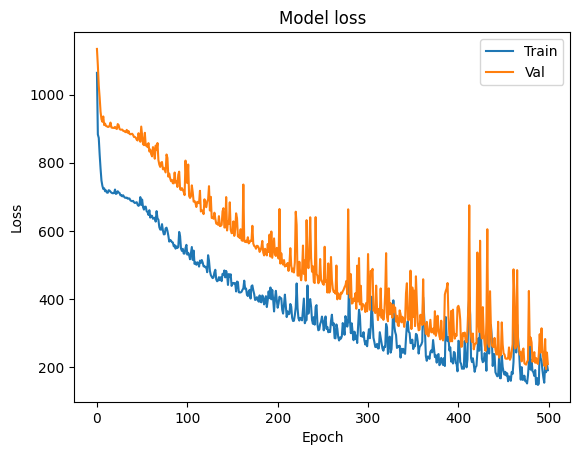

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### **Decision tree and Random Forest Regressor**  

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [ ]:
tree_model.fit(X_train.values, Y_train.values)
rf_model.fit(X_train.values, Y_train.values)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error

score_tree = mean_absolute_error(Y_test, tree_model.predict(X_test))  ##Calculating the mean absolute error Decision tree model


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
score_rf = mean_absolute_error(Y_test, rf_model.predict(X_test))  ##Calculating the mean absolute error Random Forest model


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
score_nn = mean_absolute_error(Y_test, model.predict(X_test))  ##Calculating the mean absolute error Neural Network model

3/3 [==============================] - 0s 4ms/step


Printing the mean absolute error scores for the above trained models

In [ ]:
print(score_tree)
print(score_rf)
print(score_nn)

157.55512702325962
153.75741924095948
140.96782869001098


We can say that Random Forest performed well in this case

**Save the model file**  

In [ ]:
import pickle

pickle.dump(rf_model, open('rf_model_bonds.pkl', 'wb'))